# Import of Libraries

In [28]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
#import of models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [18]:
#splitting datatsets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [19]:
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
#metrics import
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
df=pd.read_csv("E:\Data Trained\Project 2\insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [26]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [27]:
df.shape

(1338, 8)

In [32]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

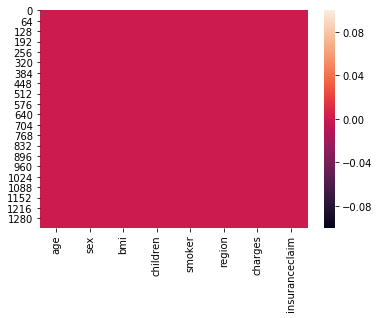

In [31]:
sns.heatmap(df.isnull())

In [34]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [22]:
# train and test splitting of data
x = df.iloc[:,:-1]
y = df.iloc[:,7]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LR 0.7971878727010232
[array([0.80167598, 0.81179775, 0.77808989])]
DTC 0.9766388383236039
[array([0.80167598, 0.81179775, 0.77808989]), array([0.97486034, 0.98595506, 0.96910112])]
KNN 0.6345437616387337
[array([0.80167598, 0.81179775, 0.77808989]), array([0.97486034, 0.98595506, 0.96910112]), array([0.65363128, 0.59831461, 0.65168539])]
NB 0.7859466867532903
[array([0.80167598, 0.81179775, 0.77808989]), array([0.97486034, 0.98595506, 0.96910112]), array([0.65363128, 0.59831461, 0.65168539]), array([0.80446927, 0.76966292, 0.78370787])]
SVM 0.6065584918293475
[array([0.80167598, 0.81179775, 0.77808989]), array([0.97486034, 0.98595506, 0.96910112]), array([0.65363128, 0.59831461, 0.65168539]), array([0.80446927, 0.76966292, 0.78370787]), array([0.59776536, 0.60674157, 0.61516854])]


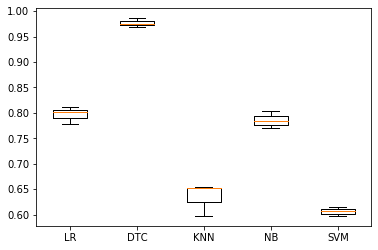

In [35]:
models=[]
def classification_Models(X_train,X_test, y_train, y_test ):
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('SVM',  SVC()) )
    modelresults = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modelresults.append(v_results)
        modelnames.append(name)
        print(modelresults)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modelresults)
        
classification_Models(X_train,X_test, y_train, y_test)

In [36]:
for name,model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    y_predict = trainedmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_predict)
    classreport = classification_report(y_test,y_predict)
    confusnMatrix = confusion_matrix(y_test,y_predict)
    
    print('The accuracy: {}'.format(accuracy))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confusnMatrix))

C:\Users\RAJSHREE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy: 0.7910447761194029
The Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       107
           1       0.79      0.89      0.84       161

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268

The Confusion Matrix:
 [[ 68  39]
 [ 17 144]]
The accuracy: 0.9776119402985075
The Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268

The Confusion Matrix:
 [[103   4]
 [  2 159]]
The accuracy: 0.6380597014925373
The Classification Report:
               precision    recall  f1-score   support

           0    

C:\Users\RAJSHREE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accuracy: 0.6305970149253731
The Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.11      0.20       107
           1       0.62      0.98      0.76       161

    accuracy                           0.63       268
   macro avg       0.69      0.54      0.48       268
weighted avg       0.67      0.63      0.53       268

The Confusion Matrix:
 [[ 12  95]
 [  4 157]]
